# Parashift - Exploratory Analysis

- Author : David Cleres 
- Date: Friday, 26th of April 2019 

## Installation 
#### Install python
In order to run this code you need python version 3.6 or above. There are sevaral ways to install python. For Windows users I recommend using the official python distribution as https://www.python.org/downloads/. It is also possible to use anaconda which works on all platform. On mac it is also possible to use Homebrew and on ubuntu you can also use the Ubuntu packaging manager.

#### Install the dependencies
Before we install the actual software we will install some packages that the software depends upon. You can do this by typing
```
pip install -r requirements.txt
```
#### Problems on Windows?
If you are using windows and get problems with compatability of the packages then I found out that a good solution is to install the dependies using something called pipwin. Then you can do

```
pip install pipwin
```
and then do

```
pipwin install -r requirements.txt
```

## Objective 
The task is to do exploratory data analysis and build a classifier for
the provided data set. (you'll figure out the target variable)

In [1]:
## Initial Imports

%matplotlib inline

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm import tqdm_notebook as tqdm

## Prelude & General Information
Welcome to my notebook about PD disease classification. The notebook is divided into 3 different parts consisting of the Data Loading and cleaning, training some well know classifiers and a part dedicated to the conclusions regarding the exploratory analysis that I performed on the dataset. Thank you for taking the time to read my document. 

## STEP 1: Load & Clean the Data Set 

The data used in this study were gathered from **188 patients with PD**
(107 men and 81 women) with ages ranging from 33 to 87 (65.1Â±10.9)
at the Department of Neurology in CerrahpaÅŸa Faculty of Medicine,
Istanbul University. The control group consists of **64 healthy
individuals (23 men and 41 women)** with ages varying between 41 and 82 (61.1Â±8.9).
During the data collection process, the microphone is set to 44.1 KHz and
following the physicianâ€™s examination, the sustained phonation of
the vowel /a/ was collected from each subject with three repetitions.

In [2]:
pd_speech_features = pd.read_csv('pd_speech_features.csv')
new_header = pd_speech_features.iloc[0] #grab the first row for the header
pd_speech_features = pd_speech_features[1:] #take the data less the header row
pd_speech_features.columns = new_header #set the header row as the df header
pd_speech_features.head()
print('The shape of the matrix is :', pd_speech_features.shape)

The shape of the matrix is : (756, 755)


#### Gather most general metadata about the data

In [204]:
pd_speech_features.info() # Gives type of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Columns: 755 entries, id to class
dtypes: category(2), float64(750), int64(3)
memory usage: 4.3 MB


In [3]:
pd_speech_features.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756,756,756,756,756,756,756,756,756,756,...,756,756,756,756,756,756,756,756,756,756
unique,252,2,740,745,748,315,319,755,646,358,...,749,755,752,753,749,752,753,753,754,2
top,50,1,0.82273,0.72248,0.42171,237,332,0.006004477,3.22E-05,0.00076,...,3.4835,4.0251,2.8454,4.2105,2.5662,3.1761,6.2712,4.6983,10.0693,1
freq,3,390,3,2,2,9,8,2,3,9,...,2,2,2,2,2,2,2,2,2,564


The describe command gives us usefull insight about how the data features are distributed (unique numbers, categories, ...) so that we can work with them in the best way. According to the paper and the dataset the task here is a binary classification task. The aims is to assess whether a person has the PD disease by only looking at the speech information gathered in the .csv file. This makes sense since *"One of the most important symptoms seen in approximately 90% of the PD patients in the earlier stages of the disease is vocal problems"*.This label is given by the "class" feature in the table. 

Let's first control that if we group by label we obtain the 188 PD patients and the 64 healty patients. We need to devide by 3 since three recording have been done by patient. 

In [4]:
pd_speech_features['patient/healthy count'] = 1
pd_speech_features.groupby('class').sum()/3

,patient/healthy count
class,
0,64
1,188


In [5]:
pd_speech_features = pd_speech_features.drop(['patient/healthy count'], axis = 1)

All the data was imported in the object type, we now need to take care about the types in the dataframe

In [6]:
pd_speech_features =  pd_speech_features.astype(float) #per default all floats 
pd_speech_features[['id', 'numPulses', 'numPeriodsPulses']] = pd_speech_features[['id', 'numPulses', 'numPeriodsPulses']].astype(int) #ints
pd_speech_features[['gender', 'class']] = pd_speech_features[['gender', 'class']].astype('category') #categoricals
pd_speech_features.dtypes

0
id                               int64
gender                        category
PPE                            float64
DFA                            float64
RPDE                           float64
numPulses                        int64
numPeriodsPulses                 int64
meanPeriodPulses               float64
stdDevPeriodPulses             float64
locPctJitter                   float64
locAbsJitter                   float64
rapJitter                      float64
ppq5Jitter                     float64
ddpJitter                      float64
locShimmer                     float64
locDbShimmer                   float64
apq3Shimmer                    float64
apq5Shimmer                    float64
apq11Shimmer                   float64
ddaShimmer                     float64
meanAutoCorrHarmonicity        float64
meanNoiseToHarmHarmonicity     float64
meanHarmToNoiseHarmonicity     float64
minIntensity                   float64
maxIntensity                   float64
meanIntensity          

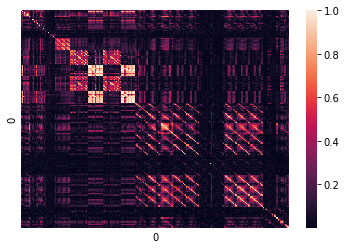

In [7]:
corr = pd_speech_features.corr() 

#too many variable to plot correlation matrix 
sns.heatmap(np.abs(corr), 
        xticklabels=[],
        yticklabels=[])

From the correlation matrix one can see that some features are strongly correlated with eachother. In order to reduce the dimentionality of the problem it could be interesting to remove one out of two strongly (positively or negatively) correlated features 

## Remove some features 
In the paper it is suggested to remove the TQWT features 

In [160]:
pd_speech_features_no_tqwt = pd_speech_features[pd_speech_features.columns[0: -433]]
pd_speech_features_no_tqwt.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,app_LT_TKEO_std_1_coef,app_LT_TKEO_std_2_coef,app_LT_TKEO_std_3_coef,app_LT_TKEO_std_4_coef,app_LT_TKEO_std_5_coef,app_LT_TKEO_std_6_coef,app_LT_TKEO_std_7_coef,app_LT_TKEO_std_8_coef,app_LT_TKEO_std_9_coef,app_LT_TKEO_std_10_coef
1,0,1.0,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,6.2990,16.7003,42.0762,101.0889,228.8489,493.8563,1015.7707,2091.9460,4188.2456,8373.9278
2,0,1.0,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,6.2381,16.5376,41.7306,100.0918,226.9019,489.9169,1006.3702,2074.4541,4148.9889,8298.1606
3,0,1.0,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,6.2163,16.4817,41.4869,99.6154,225.7803,486.9865,1001.7348,2064.1067,4127.0967,8254.7868
4,1,0.0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,6.7833,16.8216,41.3157,94.4579,211.1565,443.3447,955.8128,1890.1299,3910.7029,7698.9389
5,1,0.0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.9366,18.3595,46.2704,108.6792,244.0607,541.2414,1057.2566,2242.5460,4297.4639,8645.2845


## Remove outliers
for one specifc column based on the interquartile interval 

The data point is considered as being an outlier if it is outside of this interval: [ 0 784.0 ]


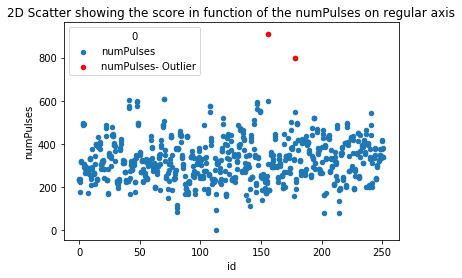

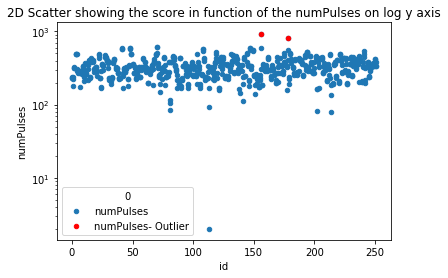

In [198]:
##Remove the outliers 
Q1 = np.percentile(pd_speech_features.numPulses, 25)
Q3 = np.percentile(pd_speech_features.numPulses, 75)
    
# Find bound
IQR = Q3 - Q1
low_outlier = max(0, Q1 - 3*IQR)
high_outlier = Q3 + 3*IQR 

print( "The data point is considered as being an outlier if it is outside of this interval: [", low_outlier , high_outlier, ']')

# Filter 
df_no_outliers = pd_speech_features[(pd_speech_features.numPulses < high_outlier) | (pd_speech_features.numPulses > low_outlier)]
df_out_outliers = pd_speech_features[(pd_speech_features.numPulses > high_outlier) | (pd_speech_features.numPulses < low_outlier)]

# Scatter plot
ax =  df_no_outliers.plot.scatter(x='id', y='numPulses', label = 'numPulses')
df_out_outliers.plot.scatter(x='id', y='numPulses', ax=ax, color='red', label = 'numPulses- Outlier')
plt.title('2D Scatter showing the score in function of the numPulses on regular axis')
plt.show()

# Scatter plot with log scale
ax =  df_no_outliers.plot.scatter(x='id', y='numPulses', label = 'numPulses', logy=True)
df_out_outliers.plot.scatter(x='id', y='numPulses', ax=ax, color='red', label = 'numPulses- Outlier', logy =True)
plt.title('2D Scatter showing the score in function of the numPulses on log y axis')
plt.show()

for all the columns based on the z-score 

In [214]:
from scipy import stats
feature_np = np.array(pd_speech_features, dtype=np.float32)
pd_speech_features_no_outliers = feature_np[(np.abs(stats.zscore(feature_np)) < 3).all(axis=1)]

In [215]:
pd_speech_features_no_outliers = pd.DataFrame(data = pd_speech_features_no_outliers) 
pd_speech_features_no_outliers.columns = pd_speech_features.columns

In [218]:
# Remove the NaNs and duplicates (there were no duplicated)
pd_speech_features_no_outliers.dropna(inplace=True)
pd_speech_features_no_outliers.drop_duplicates(inplace=True)
pd_speech_features_no_outliers.shape

(78, 755)

Note: If we remove all the outlier in all the columns, one could end up with a dataset which is too small in order to predict anything.

## STEP 2: Split into training and validation set 
Here it is important to consider that there have been 3 measurements done per person therefore one cannot only randomly split the matrix into traning and validation set since we would train and evaluate the model on data which is coming from the same person. Which is bad practice and would not reflect the classification power of the model.  

The data will be split into 85 % training and 15% validation.

The results of each algortihm will be stored in a dictionary 

In [232]:
scores_dict = {'svm' : [],'svm_less_features' : [], 'LR': [], 'LR_less_features': [], 'RF': []}

In [233]:
idx = np.arange(0, len(pd_speech_features) / 3).astype(int)
random_idx = random.sample(range(0, 251), int(len(pd_speech_features) * 0.85 / 3))

train_df = pd_speech_features[pd_speech_features.id.isin(random_idx)]
validation_df = pd_speech_features[np.logical_not(pd_speech_features.id.isin(random_idx))]

train_df_purged = pd_speech_features_no_tqwt[pd_speech_features_no_tqwt.id.isin(random_idx)]
validation_df_purged = pd_speech_features_no_tqwt[np.logical_not(pd_speech_features_no_tqwt.id.isin(random_idx))]

y_train = train_df['class']
y_train = np.array(y_train.values, dtype = 'int')
x_train = train_df.drop(['class'], axis = 1) 

y_validation = validation_df['class']
y_validation = np.array(y_validation.values, dtype = 'int')
x_validation = validation_df.drop(['class'], axis = 1) 

## 1 - Train an SVM Classifier 

#### 1.a - All Features 

In [234]:
from sklearn import svm 
from sklearn.model_selection import cross_val_score

clf = svm.SVC(gamma = 0.0001, C=1.0, random_state=None, tol=1e-8)
clf.fit(x_train, y_train)  # no Cross Validation

scores = cross_val_score(clf, x_train, y_train, cv=5) # with 5 fold CV
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

y_prediction = clf.predict(x_validation) 
pred_score = clf.score(x_validation, y_validation)
pred_score

Accuracy: 0.77 (+/- 0.00)


0.631578947368421

The cross validation does not increase the predition accuracy a lot. This shows that we are not overfitting the data.

### Compute the Confusion Matrix

In [235]:
def compute_confusion_matrix(true, pred):
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

def compute_accuracy(confusion_matrix, epsilon = 1e-7):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return (TP+TN) / (TP+TN+FP+FN+epsilon) 

def compute_precision(confusion_matrix, epsilon = 1e-7):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return TP / (FP+TP+epsilon)

def compute_f1(confusion_matrix, epsilon = 1e-7):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return  (2*TP) / (2*TP+FP + FN+epsilon) 

def compute_recall(confusion_matrix, epsilon = 1e-7):
    TP, FP, TN, FN = confusion_matrix_decomposition(confusion_matrix)
    return TP / (TP + FN+epsilon)

def confusion_matrix_decomposition(confusion_matrix): 
    TP = confusion_matrix[0,0]
    FP = confusion_matrix[0,1]
    TN = confusion_matrix[1,1]
    FN = confusion_matrix[1,0]
    
    return TP, FP, TN, FN

Accuracy is the proximity of measurement results to the true value; precision, the repeatability, or reproducibility of the measurement
- precision or positive predictive value (PPV) : The precision is given by : PPV = TP / (FP+TP)
- accuracy (ACC) = (TP+TN) / (TP+TN+FP+FN)
- F1 score is the harmonic mean of precision and sensitivity = (2TP) / (2TP+FP+FN)
- sensitivity, recall, hit rate, or true positive rate (TPR) = TP / (TP + FN)

In [236]:
confusion_matrix = compute_confusion_matrix(y_validation, y_prediction.astype('int'))
print(confusion_matrix)
print('Our testing accuracy is {}'.format(pred_score))

[[ 0. 42.]
 [ 0. 72.]]
Our testing accuracy is 0.631578947368421


In [237]:
accuracy = compute_accuracy(confusion_matrix)
precision = compute_precision(confusion_matrix)
F1 =  compute_f1(confusion_matrix)
recall = compute_recall(confusion_matrix)

print('accuracy', accuracy)
print('precision', precision)
print('F1', F1)
print('recall', recall)

scores_dict['svm'] = [accuracy,precision, F1, recall]

accuracy 0.6315789468144045
precision 0.0
F1 0.0
recall 0.0


#### 1.b - Less Features 

In [238]:
clf = svm.SVC(gamma = 0.0001, C=1.0, random_state=None, tol=1e-8)
clf.fit(train_df_purged, y_train)  # no Cross Validation

scores = cross_val_score(clf, train_df_purged, y_train, cv=5) # with 5 fold CV
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

y_prediction_purged = clf.predict(validation_df_purged) 
pred_score = clf.score(validation_df_purged, y_validation)
pred_score

Accuracy: 0.77 (+/- 0.00)


0.631578947368421

In [239]:
confusion_matrix = compute_confusion_matrix(y_validation, y_prediction.astype('int'))
print(confusion_matrix)
print('Our testing accuracy is {}'.format(pred_score))

[[ 0. 42.]
 [ 0. 72.]]
Our testing accuracy is 0.631578947368421


In [240]:
accuracy = compute_accuracy(confusion_matrix)
precision = compute_precision(confusion_matrix)
F1 =  compute_f1(confusion_matrix)
recall = compute_recall(confusion_matrix)

print('accuracy', accuracy)
print('precision', precision)
print('F1', F1)
print('recall', recall)

scores_dict['svm_less_features'] = [accuracy,precision, F1, recall]

accuracy 0.6315789468144045
precision 0.0
F1 0.0
recall 0.0


## 2 - Train Logitics Regression

#### 2.a - All Features 

In [243]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
clf.score(x_validation, y_validation)

0.6666666666666666

In [244]:
scores = cross_val_score(clf, x_train, y_train, cv=5) # with 5 fold CV
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.76 (+/- 0.02)


In [245]:
pred_proba_df = pd.DataFrame(clf.predict_proba(x_validation)) #predict the labels

threshold_list = np.linspace(0.0001, 1, 1000)
accuracy = []
precision = []
f1_score = []
recall = []

for i in threshold_list:
    y_prediction = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    y_prediction.columns = ['labels0', 'label1']
    y_prediction = y_prediction['label1'].values
    test_accuracy = accuracy_score(y_validation, y_prediction)
    confusion_matrix = compute_confusion_matrix(y_validation, y_prediction)
    
    accuracy.append(compute_accuracy(confusion_matrix))
    precision.append(compute_precision(confusion_matrix))
    f1_score.append(compute_f1(confusion_matrix))
    recall.append(compute_recall(confusion_matrix))

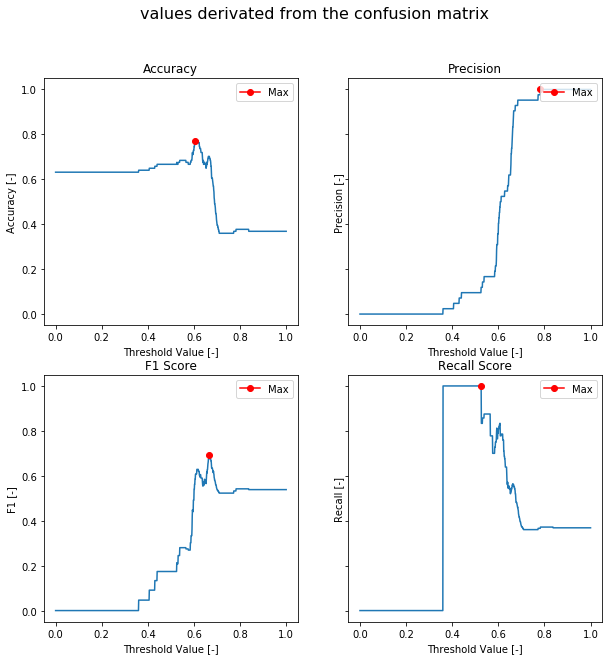

In [249]:
f, axes = plt.subplots(2, 2, sharey=True, figsize=(10,10))
    
axes[0,0].plot(threshold_list, accuracy)
axes[0,0].plot(threshold_list[np.argmax(accuracy)], np.max(accuracy), color = 'red', marker='o', label = 'Max')
axes[0,0].title.set_text('Accuracy')
axes[0,0].set_ylabel('Accuracy [-]')
axes[0,0].set_xlabel('Threshold Value [-]')
axes[0,0].legend(loc="upper right")

axes[0,1].plot(threshold_list, precision)
axes[0,1].plot(threshold_list[np.argmax(precision)], np.max(precision), color = 'red', marker='o', label = 'Max')
axes[0,1].title.set_text('Precision')
axes[0,1].set_ylabel('Precision [-]')
axes[0,1].set_xlabel('Threshold Value [-]')
axes[0,1].legend(loc="upper right")

axes[1,0].plot(threshold_list, f1_score)
axes[1,0].plot(threshold_list[np.argmax(f1_score)], np.max(f1_score), color = 'red', marker='o', label = 'Max')
axes[1,0].title.set_text('F1 Score')
axes[1,0].set_ylabel('F1 [-]')
axes[1,0].set_xlabel('Threshold Value [-]')
axes[1,0].legend(loc="upper right")

axes[1,1].plot(threshold_list, recall)
axes[1,1].plot(threshold_list[np.argmax(recall)], np.max(recall), color = 'red', marker='o', label = 'Max')
axes[1,1].title.set_text('Recall Score')
axes[1,1].set_ylabel('Recall [-]')
axes[1,1].set_xlabel('Threshold Value [-]')
axes[1,1].legend(loc="upper right")


f.suptitle("values derivated from the confusion matrix", fontsize=16)
plt.show()

scores_dict['LR'] = [np.max(accuracy),np.max(precision), np.max(F1), np.max(recall)]


**COMMENT** We can see that changing the threshold does not have a lot of impact in the training accuracy. The only value for which the prediction accuracy changes is when the threshold is set at 0.01. This means that the logistic regression here, splits the data quite clearly.

#### 2.b - Less Features 

Accuracy: 0.76 (+/- 0.02)


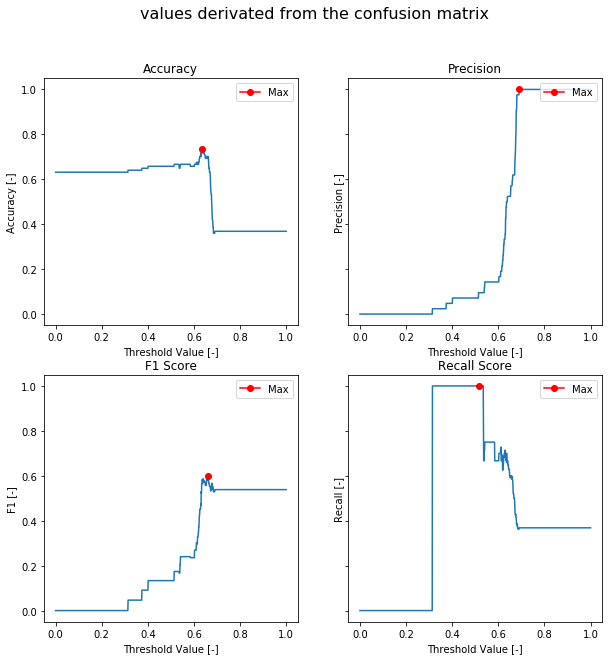

In [250]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(train_df_purged, y_train)
clf.score(validation_df_purged, y_validation)

scores = cross_val_score(clf, x_train, y_train, cv=5) # with 5 fold CV
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

pred_proba_df = pd.DataFrame(clf.predict_proba(validation_df_purged)) #predict the labels

threshold_list = np.linspace(0.0001, 1, 1000)
accuracy = []
precision = []
f1_score = []
recall = []

for i in threshold_list:
    y_prediction = pred_proba_df.applymap(lambda x: 1 if x > i else 0)
    y_prediction.columns = ['labels0', 'label1']
    y_prediction = y_prediction['label1'].values
    test_accuracy = accuracy_score(y_validation, y_prediction)
    confusion_matrix = compute_confusion_matrix(y_validation, y_prediction)
    
    accuracy.append(compute_accuracy(confusion_matrix))
    precision.append(compute_precision(confusion_matrix))
    f1_score.append(compute_f1(confusion_matrix))
    recall.append(compute_recall(confusion_matrix))

f, axes = plt.subplots(2, 2, sharey=True, figsize=(10,10))
    
axes[0,0].plot(threshold_list, accuracy)
axes[0,0].plot(threshold_list[np.argmax(accuracy)], np.max(accuracy), color = 'red', marker='o', label = 'Max')
axes[0,0].title.set_text('Accuracy')
axes[0,0].set_ylabel('Accuracy [-]')
axes[0,0].set_xlabel('Threshold Value [-]')
axes[0,0].legend(loc="upper right")

axes[0,1].plot(threshold_list, precision)
axes[0,1].plot(threshold_list[np.argmax(precision)], np.max(precision), color = 'red', marker='o', label = 'Max')
axes[0,1].title.set_text('Precision')
axes[0,1].set_ylabel('Precision [-]')
axes[0,1].set_xlabel('Threshold Value [-]')
axes[0,1].legend(loc="upper right")

axes[1,0].plot(threshold_list, f1_score)
axes[1,0].plot(threshold_list[np.argmax(f1_score)], np.max(f1_score), color = 'red', marker='o', label = 'Max')
axes[1,0].title.set_text('F1 Score')
axes[1,0].set_ylabel('F1 [-]')
axes[1,0].set_xlabel('Threshold Value [-]')
axes[1,0].legend(loc="upper right")

axes[1,1].plot(threshold_list, recall)
axes[1,1].plot(threshold_list[np.argmax(recall)], np.max(recall), color = 'red', marker='o', label = 'Max')
axes[1,1].title.set_text('Recall Score')
axes[1,1].set_ylabel('Recall [-]')
axes[1,1].set_xlabel('Threshold Value [-]')
axes[1,1].legend(loc="upper right")


f.suptitle("values derivated from the confusion matrix", fontsize=16)
plt.show()

scores_dict['LR_less_features'] = [np.max(accuracy),np.max(precision), np.max(F1), np.max(recall)]

Removing features from the array. Did increase the accuracy. However the std. dev. also increased. Therefore, the performance is not much better than before. For this reason, I will use the entire dataset for the next questions. 

## 3 - Train a random Forest classifier 

#### 3.a. All features

In [16]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy') 
classifier.fit(x_train, y_train) 

# predicting the test set result
y_pred_Rforest = classifier.predict(x_validation)

classifier.score(x_validation, y_validation)

0.8596491228070176

In [149]:
scores = cross_val_score(classifier, x_train, y_train, cv=5) # with 5 fold CV
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81 (+/- 0.07)


NOTE: One could have done a 5-fold cross-validation on the training set to fine-tune the parameters of the classifier using a grid search on the number of estimators "n_estimators" and the max depth of the trees "max_depth" and then take the mean score accross the 5 CV for each pair of features.
Here I started with computing the accuracy, recall, precision and F1 score for all the different depth and number of estimator values.

In [17]:
max_depth = np.linspace(1, 50, 50).astype(int)
n_estimators = np.linspace(1, 50, 50).astype(int)

accuracy_depth = []
precision_depth = []
f1_score_depth = []
recall_depth = []
    
for depth in tqdm(max_depth): 
    accuracy_estimator = []
    precision_estimator = []
    f1_score_estimator = []
    recall_estimator = []

    for estimator in n_estimators:
              
        classifier = RandomForestClassifier(criterion = 'entropy', max_depth = depth, n_estimators = estimator)
        classifier.fit(x_train, y_train)

        y_pred_Rforest = classifier.predict(x_validation)
        confusion_matrix = compute_confusion_matrix(y_validation, y_pred_Rforest.astype('int'))

        accuracy_cv.append(compute_accuracy(confusion_matrix))
        precision_cv.append(compute_precision(confusion_matrix))
        f1_score_cv.append(compute_f1(confusion_matrix))
        recall_cv.append(compute_recall(confusion_matrix))
            
    accuracy_depth.append(accuracy_cv)
    precision_depth.append(precision_cv)
    f1_score_depth.append(f1_score_cv)
    recall_depth.append(recall_cv)

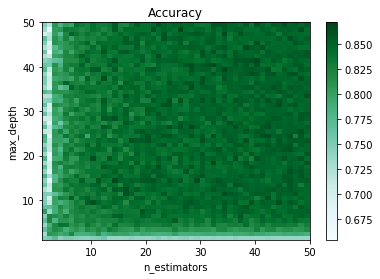

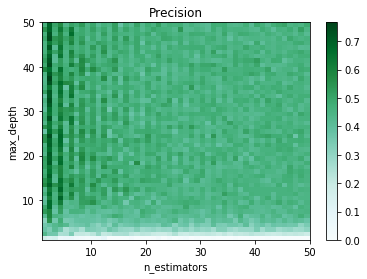

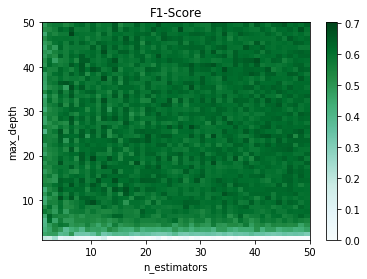

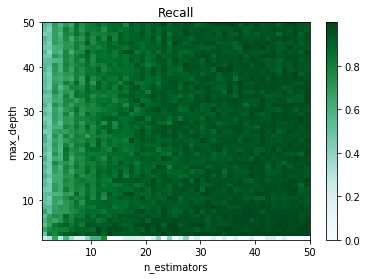

In [18]:
#plt.contour(n_estimators, max_depth, accuracy_depth, 30, linewidths = 0.5, cmap='BuGn')
plt.pcolormesh(n_estimators, max_depth, accuracy_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

plt.pcolormesh(n_estimators, max_depth, precision_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('Precision')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

plt.pcolormesh(n_estimators, max_depth, f1_score_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('F1-Score')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

plt.pcolormesh(n_estimators, max_depth, recall_depth, cmap = plt.get_cmap('BuGn'))
plt.colorbar()
plt.title('Recall')
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.show()

**COMMENT** : I decided to focus more on the recall value than on the other factors since it is more important to have a very low number of false negatives. In these plots in 2D, the axes represented the values of a feature (either max_depth or n_estimators) that we varies and the intensity of the green is the values of accuracy, recall, f1-score and precision. Finally, we selected the features that maximized the values of the recall and we used these paramters for the other questions of the task. It is also worth to notice that the generation of these plots might take a while. I performed them since I had time to run the code overnight and I was interested in getting some detailled results since this claissifer seemed to be the most accurate one. **In order to shorten the process I invite you to run the grid search with less parameters**. 

In [282]:
#Find the paramters that maximise the recall value
column = np.argmax(recall_depth)%50
row = int((np.argmax(recall_depth)-column)/50)

#  rows = depth and column = column
print('The best parameters are : max_depth = ', max_depth[row], 'and the n_estimators = ', n_estimators[column])
print('Accuracy = ', accuracy_depth[row][column])
print('Precision = ', precision_depth[row][column])
print('Recall = ', recall_depth[row][column])
print('F1 score = ', f1_score_depth[row][column])

classifier = RandomForestClassifier(n_estimators = n_estimators[column], max_depth = max_depth[row],criterion = 'entropy') 
classifier.fit(x_train, y_train) 

# predicting the test set result
y_pred_Rforest = classifier.predict(x_validation)

The best parameters are : max_depth =  47 and the n_estimators =  34
Accuracy =  0.8684210518698062
Precision =  0.49999999833333336
Recall =  0.999999993285068
F1 score =  0.6656110821440157


In [283]:
classifier.score(x_validation, y_validation)

0.8157894736842105

In [284]:
print(compute_confusion_matrix(y_validation, y_pred_Rforest.astype('int')))
print('As mentionned above the scores are : \nAccuracy = ', accuracy_depth[row][column])
print('Precision = ', precision_depth[row][column])
print('Recall = ', recall_depth[row][column])
print('F1 score = ', f1_score_depth[row][column])

[[25. 17.]
 [ 4. 68.]]
As mentionned above the scores are : 
Accuracy =  0.8684210518698062
Precision =  0.49999999833333336
Recall =  0.999999993285068
F1 score =  0.6656110821440157


In [285]:
scores_dict['RF'] = [ accuracy_depth[row][column],precision_depth[row][column], recall_depth[row][column], f1_score_depth[row][column]]

#### The most important features are given by : 

In [172]:
feat_labels = train_df.columns

# Print the name and gini importance of each feature
for feature in zip(feat_labels, classifier.feature_importances_):
    print(feature)

('id', 0.003520184947792202)
('gender', 0.0)
('PPE', 0.00015580547363247557)
('DFA', 0.0010492073329976712)
('RPDE', 0.0004528020928147829)
('numPulses', 0.0017833862960875014)
('numPeriodsPulses', 0.0005871559831588871)
('meanPeriodPulses', 0.0005157350277732159)
('stdDevPeriodPulses', 0.0)
('locPctJitter', 0.0007608857602048787)
('locAbsJitter', 0.005478989896842242)
('rapJitter', 0.0023417944545250126)
('ppq5Jitter', 0.0)
('ddpJitter', 0.0026379259546551485)
('locShimmer', 0.0025117775776325874)
('locDbShimmer', 0.004017168170206704)
('apq3Shimmer', 0.0012944283059438536)
('apq5Shimmer', 0.0)
('apq11Shimmer', 0.0019124367823350674)
('ddaShimmer', 0.0)
('meanAutoCorrHarmonicity', 0.004038966166191739)
('meanNoiseToHarmHarmonicity', 0.001632268829852442)
('meanHarmToNoiseHarmonicity', 0.0017458715570007953)
('minIntensity', 0.00594373524232634)
('maxIntensity', 0.0005381427696109335)
('meanIntensity', 0.0017455971289791984)
('f1', 0.00015176703837978316)
('f2', 0.004247701102483854)
(

In [174]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.15
sfm = SelectFromModel(classifier, threshold=0.015)

# Train the selector
sfm.fit(x_train, y_train)

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

tqwt_TKEO_mean_dec_16


In [277]:
from torch.nn.functional import normalize
x_train_tensor = torch.from_numpy(np.array(x_train, dtype = float)).float()
x_train_tensor = normalize(x_train_tensor)
x_train_norm = x_train_tensor.numpy()

x_validation_tensor = torch.from_numpy(np.array(x_validation, dtype = float)).float()
x_validation_tensor = normalize(x_validation_tensor)
x_validation_norm = x_validation_tensor.numpy()

In [278]:
#classifier = RandomForestClassifier(n_estimators = n_estimators[column], max_depth = max_depth[row],criterion = 'entropy') 
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy') 
classifier.fit(x_train_norm, y_train) 

# predicting the test set result
y_pred_Rforest = classifier.predict(x_validation_norm)
classifier.score(x_validation_norm, y_validation)

0.7017543859649122

In [287]:
print(compute_confusion_matrix(y_validation, y_pred_Rforest.astype('int')))

accuracy = compute_accuracy(confusion_matrix)
precision = compute_precision(confusion_matrix)
F1 =  compute_f1(confusion_matrix)
recall = compute_recall(confusion_matrix)

print('accuracy', accuracy)
print('precision', precision)
print('F1', F1)
print('recall', recall)

scores_dict['RF_norm'] = [accuracy,precision, F1, recall]

[[25. 17.]
 [ 4. 68.]]
accuracy 0.3684210523084026
precision 0.9999999976190476
F1 0.5384615381163709
recall 0.3684210523084026


## STEP 3: Conclusions

In this case, the False Negative (FN) values are the most important to focus on. A False Negative (FN) value means that the regression classified a patient as not being sick even if the person would have been was. This would have major consequences for the patient since he would not get the medication that the patient needs. The recall, accuracy and F1 score are depending on the FN values. The F1 score is the harmonic mean of the sensitivity and precision. This score penalizes a lot a model which is making mistakes on classification. However, the recall, also called, sensitivity measure seems to be the most critical regarding the False Negatives. Since we assess which measure of the error is the most critical to us, we decide to adapt the threshold for the next parts based on the threshold that gave the maximal recall value. However, considering the other score we can see that setting the threshold to the ideal one of the recall leads to very poor performance on the other scores. therefore we decide to set the threshold to a values where all the scores are "good" and the recall very good for this value. By doing so we still gave more importance to the recall score but we still respected the information given by the three others.

In [288]:
scores_df = pd.DataFrame(data = scores_dict) 
scores_df_T = scores_df.transpose()
scores_df_T.columns = ['accuracy', 'precision', 'recall', 'F1']
scores_df_T

,accuracy,precision,recall,F1
svm,0.631579,0.0,0.000000,0.000000
svm_less_features,0.631579,0.0,0.000000,0.000000
LR,0.771930,1.0,0.000000,1.000000
LR_less_features,0.736842,1.0,0.000000,1.000000
RF,0.868421,0.5,1.000000,0.665611
RF_norm,0.368421,1.0,0.538462,0.368421


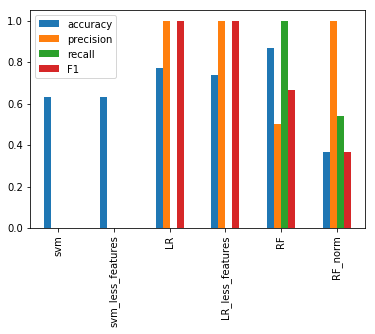

In [289]:
scores_df_T.plot(kind='bar')

While comparing the classifiers, one could see that the Grid searched Random Forest classifiers perform the best for this task. The random Forest classifier was able to reach a good accuracy and a very good recall with the parameters that minimized the number of false negatives. This is not that surprising considering that random forest classification remains the state of the art in many domains. However, it would have been interesting to spend more time on implementing the neural network that you can find in the appendix in order to assess if one could increase the recall and the precision score even more in order to increase the predictivity of our model ...

The performance of the Neural Net was fairly poor therefore the random forest classifier seems to be the best solution. 

## Appendix - Train a Neural Network in order to solve the problem

In [117]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, 5) #nn.Conv2d(nbChannels, outputChannels, kxk Square convolution)
        self.pool = nn.MaxPool1d(1, 1)
        self.conv2 = nn.Conv1d(16, 32, 3)
        self.dp = nn.Dropout(0.3)
        self.fc1 = nn.Linear(32 * 748, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, 2) #2 output channel one for the left direction and one for the rightweb

    def forward(self, x):
        print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        x = self.dp(x)
        print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        x = self.dp(x)
        print(x.shape)
        x = x.view(-1, 32 * 748)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [118]:
criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
optimizer = optim.Adam(net.parameters(), lr=0.001,weight_decay=5e-5) #  L2 regularization

#### Normalize the Data 
In ANN and other data mining approaches we need to normalize the inputs, otherwise the network will be ill-conditioned. In essence, normalization is done to have the same range of values for each of the inputs to the ANN model. This can guarantee stable convergence of weight and biases.

In [119]:
from torch.nn.functional import normalize

In [120]:
for epoch in range(50):  # loop over the dataset multiple times
    print ("\nEpoch ", epoch)
    running_loss = 0.0
    
    x_train_tensor = torch.from_numpy(np.array(x_train, dtype = float)).float()
    x_train_tensor = normalize(x_train_tensor)
    x_train_tensor = x_train_tensor.reshape(x_train_tensor.shape[0], 1, x_train_tensor.shape[1]) # make it float and insert a fake batch dimension

    # wrap them in Variable
    inputs, labels = Variable(x_train_tensor), Variable(torch.from_numpy(np.array(y_train.values, dtype = 'int')))

    # zero the parameter gradients
    optimizer.zero_grad()

    # forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
 
    optimizer.step()

    print(outputs)
    running_loss = loss.data
    print("Running loss", running_loss)
    
    # Validation accuracy
    params = ["acc", "auc", "fmeasure"]


Epoch  0
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.0215,  0.0712],
        [-0.0268,  0.0965],
        [-0.0331,  0.0749],
        ...,
        [-0.0309,  0.0716],
        [-0.0286,  0.0717],
        [-0.0352,  0.0804]], grad_fn=<AddmmBackward>)
Running loss tensor(0.6681)

Epoch  1
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-2.2881,  3.5493],
        [-2.2596,  3.5144],
        [-2.2829,  3.5279],
        ...,
        [-2.2956,  3.5508],
        [-2.3194,  3.5938],
        [-2.3015,  3.5523]], grad_fn=<AddmmBackward>)
Running loss tensor(1.4763)

Epoch  2
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.6111,  1.1514],
        [-0.6084,  1.1413],
        [-0.6093,  1.1319],
        ...,
        [-0.5880,  1.1316],
        [-0.6069,  1.1369],
        [-0.5989,  1.1434]], grad_fn=<AddmmBackward>)
Running loss tensor(0.6022)

Epoch  3
torch.Size([642

torch.Size([642, 32, 748])
tensor([[-0.1241,  0.8104],
        [-0.1264,  0.8114],
        [-0.1278,  0.7904],
        ...,
        [-0.1285,  0.8203],
        [-0.1312,  0.8093],
        [-0.1297,  0.8041]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5671)

Epoch  26
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.1261,  0.7899],
        [-0.1251,  0.8014],
        [-0.1252,  0.8063],
        ...,
        [-0.1242,  0.8094],
        [-0.1230,  0.8109],
        [-0.1236,  0.7988]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5674)

Epoch  27
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.1275,  0.8090],
        [-0.1331,  0.8150],
        [-0.1301,  0.8113],
        ...,
        [-0.1296,  0.8002],
        [-0.1273,  0.8115],
        [-0.1303,  0.8149]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5668)

Epoch  28
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 7

torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.1729,  0.8752],
        [-0.1782,  0.8883],
        [-0.1743,  0.8590],
        ...,
        [-0.1780,  0.8914],
        [-0.1807,  0.8821],
        [-0.1820,  0.8848]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5648)

Epoch  52
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.1787,  0.8816],
        [-0.1772,  0.8831],
        [-0.1769,  0.8856],
        ...,
        [-0.1746,  0.8719],
        [-0.1751,  0.8671],
        [-0.1734,  0.8596]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5653)

Epoch  53
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.1754,  0.8622],
        [-0.1766,  0.8726],
        [-0.1828,  0.8691],
        ...,
        [-0.1799,  0.8665],
        [-0.1768,  0.8749],
        [-0.1767,  0.8648]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5649)

Epoch  54
torch.Size([642, 1, 754])
torch.Size([642, 16, 7

tensor([[-0.2111,  0.8636],
        [-0.2121,  0.8650],
        [-0.2113,  0.8599],
        ...,
        [-0.2125,  0.8630],
        [-0.2105,  0.8665],
        [-0.2135,  0.8697]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5648)

Epoch  77
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.2304,  0.8513],
        [-0.2317,  0.8410],
        [-0.2352,  0.8635],
        ...,
        [-0.2338,  0.8610],
        [-0.2279,  0.8312],
        [-0.2307,  0.8598]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5648)

Epoch  78
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.2505,  0.8340],
        [-0.2460,  0.8294],
        [-0.2518,  0.8624],
        ...,
        [-0.2518,  0.8412],
        [-0.2529,  0.8505],
        [-0.2495,  0.8370]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5650)

Epoch  79
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.2591,  0.8

torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3292,  0.7668],
        [-0.3295,  0.7627],
        [-0.3250,  0.7553],
        ...,
        [-0.3271,  0.7653],
        [-0.3219,  0.7538],
        [-0.3283,  0.7622]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5652)

Epoch  103
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3138,  0.7413],
        [-0.3214,  0.7524],
        [-0.3135,  0.7446],
        ...,
        [-0.3175,  0.7510],
        [-0.3168,  0.7510],
        [-0.3216,  0.7675]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5650)

Epoch  104
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3321,  0.7784],
        [-0.3350,  0.7731],
        [-0.3230,  0.7546],
        ...,
        [-0.3257,  0.7581],
        [-0.3226,  0.7518],
        [-0.3294,  0.7628]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5647)

Epoch  105
torch.Size([642, 1, 754])
torch.Size([642, 16

torch.Size([642, 32, 748])
tensor([[-0.3171,  0.7471],
        [-0.3314,  0.7708],
        [-0.3153,  0.7378],
        ...,
        [-0.3252,  0.7734],
        [-0.3301,  0.7660],
        [-0.3137,  0.7420]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5650)

Epoch  128
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3255,  0.7528],
        [-0.3202,  0.7425],
        [-0.3313,  0.7652],
        ...,
        [-0.3311,  0.7582],
        [-0.3294,  0.7692],
        [-0.3308,  0.7691]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5651)

Epoch  129
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3355,  0.7762],
        [-0.3179,  0.7490],
        [-0.3241,  0.7576],
        ...,
        [-0.3249,  0.7617],
        [-0.3193,  0.7463],
        [-0.3235,  0.7529]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5645)

Epoch  130
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32

tensor([[-0.3524,  0.7641],
        [-0.3456,  0.7476],
        [-0.3553,  0.7698],
        ...,
        [-0.3464,  0.7396],
        [-0.3390,  0.7281],
        [-0.3379,  0.7374]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5650)

Epoch  153
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3512,  0.7556],
        [-0.3454,  0.7500],
        [-0.3520,  0.7600],
        ...,
        [-0.3312,  0.7184],
        [-0.3555,  0.7706],
        [-0.3412,  0.7322]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5650)

Epoch  154
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3360,  0.7413],
        [-0.3437,  0.7525],
        [-0.3461,  0.7421],
        ...,
        [-0.3495,  0.7588],
        [-0.3331,  0.7317],
        [-0.3457,  0.7480]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5650)

Epoch  155
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3381,  

torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3629,  0.7076],
        [-0.3699,  0.7114],
        [-0.3774,  0.7318],
        ...,
        [-0.3660,  0.7118],
        [-0.3771,  0.7286],
        [-0.3651,  0.7083]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5645)

Epoch  179
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3768,  0.7150],
        [-0.3766,  0.7106],
        [-0.3720,  0.7075],
        ...,
        [-0.3683,  0.7086],
        [-0.3662,  0.7046],
        [-0.3679,  0.7006]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5653)

Epoch  180
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3763,  0.7187],
        [-0.3810,  0.7333],
        [-0.3759,  0.7211],
        ...,
        [-0.3705,  0.7113],
        [-0.3623,  0.6994],
        [-0.3782,  0.7239]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5651)

Epoch  181
torch.Size([642, 1, 754])
torch.Size([642, 16

torch.Size([642, 32, 748])
tensor([[-0.3948,  0.6954],
        [-0.3958,  0.7034],
        [-0.3983,  0.7001],
        ...,
        [-0.3963,  0.7064],
        [-0.3982,  0.7001],
        [-0.3994,  0.6999]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5652)

Epoch  204
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3974,  0.7058],
        [-0.3947,  0.6947],
        [-0.3903,  0.6986],
        ...,
        [-0.3970,  0.7063],
        [-0.3922,  0.6917],
        [-0.3885,  0.6938]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5646)

Epoch  205
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.3861,  0.6940],
        [-0.3904,  0.7030],
        [-0.3858,  0.6854],
        ...,
        [-0.3928,  0.7012],
        [-0.3942,  0.7071],
        [-0.3797,  0.6786]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5649)

Epoch  206
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32

tensor([[-0.4163,  0.6844],
        [-0.4021,  0.6636],
        [-0.4104,  0.6699],
        ...,
        [-0.4077,  0.6745],
        [-0.4143,  0.6833],
        [-0.4059,  0.6647]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5645)

Epoch  229
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.4035,  0.6665],
        [-0.4169,  0.6874],
        [-0.4247,  0.7038],
        ...,
        [-0.3997,  0.6654],
        [-0.4047,  0.6694],
        [-0.3969,  0.6514]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5646)

Epoch  230
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.4134,  0.6907],
        [-0.4092,  0.6773],
        [-0.4120,  0.6863],
        ...,
        [-0.4040,  0.6701],
        [-0.4102,  0.6832],
        [-0.4135,  0.6880]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5646)

Epoch  231
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.4143,  

torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.4181,  0.6681],
        [-0.4120,  0.6588],
        [-0.4142,  0.6558],
        ...,
        [-0.4173,  0.6726],
        [-0.4125,  0.6617],
        [-0.4191,  0.6748]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5646)

Epoch  255
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.4260,  0.6679],
        [-0.4203,  0.6640],
        [-0.4182,  0.6562],
        ...,
        [-0.4133,  0.6470],
        [-0.4107,  0.6373],
        [-0.4263,  0.6695]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5649)

Epoch  256
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.4281,  0.6607],
        [-0.4424,  0.6877],
        [-0.4299,  0.6669],
        ...,
        [-0.4270,  0.6659],
        [-0.4299,  0.6625],
        [-0.4314,  0.6710]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5647)

Epoch  257
torch.Size([642, 1, 754])
torch.Size([642, 16

torch.Size([642, 32, 748])
tensor([[-0.4335,  0.6467],
        [-0.4436,  0.6690],
        [-0.4423,  0.6616],
        ...,
        [-0.4310,  0.6378],
        [-0.4345,  0.6420],
        [-0.4270,  0.6323]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5650)

Epoch  280
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.4422,  0.6675],
        [-0.4235,  0.6449],
        [-0.4332,  0.6516],
        ...,
        [-0.4273,  0.6465],
        [-0.4311,  0.6464],
        [-0.4326,  0.6559]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5647)

Epoch  281
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32, 748])
tensor([[-0.4412,  0.6688],
        [-0.4287,  0.6397],
        [-0.4338,  0.6510],
        ...,
        [-0.4372,  0.6551],
        [-0.4396,  0.6635],
        [-0.4348,  0.6575]], grad_fn=<AddmmBackward>)
Running loss tensor(0.5654)

Epoch  282
torch.Size([642, 1, 754])
torch.Size([642, 16, 750])
torch.Size([642, 32

In [121]:
correct = 0
total = 0

#prediction = torch.from_numpy(normalized_input_test).float() #With normalized input 
x_validation_tensor = torch.from_numpy(np.array(x_validation, dtype = float)).float()
x_validation_tensor = normalize(x_validation_tensor)
x_validation_tensor = x_validation_tensor.reshape(x_validation_tensor.shape[0],1, x_validation_tensor.shape[1]) # make it float and insert a fake batch dimension

# wrap them in Variable
predictionVar, labelsVar = Variable(x_validation_tensor), Variable(torch.from_numpy(np.array(y_validation, dtype = 'int')))
labels = torch.from_numpy(np.array(y_validation, dtype = 'int'))

# forward + backward + optimize
#The outputs are energies for the 10 classes. Higher the energy for a class, the more the network thinks
#that the image is of the particular class. So, let’s get the index of the highest energy:
outputsPred = net(predictionVar) 

_, predicted = torch.max(outputsPred.data, 1) #predicted contains the predicted labels 
total += labels.size(0)
correct += (predicted == labels).sum()

print('Accuracy of the network on the test singals: %d %%' % (100 * correct / total))

torch.Size([114, 1, 754])
torch.Size([114, 16, 750])
torch.Size([114, 32, 748])
Accuracy of the network on the test singals: 73 %


NOTE: Considering that the loss is not changing a lot through the epoch it seems that the model is not learnign anything from the data. Certainly the architecture mneeds to be considered again in order to make the model better. I have more experience with computer vision and images therefore I tried do to something inspired by this. 

## Additional Ideas 
- More **feature engineering**: One could regroup the continuous data into a discrete number of categories, take the log of certain values if one want to highligh the small values and decreae the impact of high values, investigate in more detail all the different parameters (see the distribution, ...) 
- **Data augmentation** : It seems that, at least to train a fairly accurate Neural Network, more data should be necessary. 
- **Bootstrapping** for better stastiscal information about our results 
- Use other classifiers
- Use **batches** of data and not the entire dataset. 
- Compute **dummies** for the categorical data.
- Compute the p-values of each parameters and do a **backward feature selection**

In [ ]:
def compute_p_value_lr(X, y): 
    '''
    Computes the p-values using the negative inverse of the Hessian Matrix.
    The results from this function will be usefull to compare the results from our custom fucntion with.
    '''
    model = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(X, y)    
    predictions = model.predict(X)
    params = model.coef_[0]

    ## add VERY small white noise in order to make sure that the hessian matrix is invertible for any data. 
    newX = X + 0.0001 * np.random.rand(X.shape[0], X.shape[1])
                
    MSE = (sum((y-predictions)**2))/(len(newX)-len(newX.columns))

    var_b = MSE * (np.linalg.inv(np.dot(newX.T,newX)).diagonal())
    
    sd_b = np.sqrt(var_b)
    ts_b = params / sd_b

    p_values =[2*(1-stats.t.cdf(np.abs(i),(len(newX)-1))) for i in ts_b]

    sd_b = np.round(sd_b, 5)
    ts_b = np.round(ts_b, 5)
    p_values = np.round(p_values, 5)
    params = np.round(params, 5)
    name = X.columns
                     
    myDF3 = pd.DataFrame()
    myDF3["Name"],myDF3["Coefficients"],myDF3["Standard Errors"],myDF3["t_values"],myDF3["Probability"] = [name, params, sd_b, ts_b, p_values]    
   
    return myDF3, newX

In [ ]:
def backward_selection(X, y, number_features_selected):
    '''
    In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. 
    We repeat this until no improvement is observed on removal of features. 
    Backward elimination could be done in the following steps :
        - STEP 1 : Select a **significant level** (ie: 0.05 ; If the P value is greater than this significant level, then we will remove it) or chose the **number k of features** to keep
        - STEP 2: Fit ALL training variables to the model.
        - STEP 3: Find the P values for ALL variables.
        - STEP 4: Remove the variable with the largest P value.
        - STEP 5: Fit the model with a variable removed from Step 4.
        - STEP 6: Repeat Step 4 & 5 , until all P values are smaller than the significant level defined in Step 1.
    The variance covariance matrix can be aproximated by the inverse of the negative Hessian H (matrix of second order partial derivatives).
    '''
    while len(X.columns) >= number_features_selected: 

        tmp_df, X = compute_p_value_lr(X, y)
        tmp_df.t_values = tmp_df.t_values.abs()
        t_values_sorted = tmp_df[['t_values', 'Name', 'Probability']].sort_values('t_values', ascending = True)
        X = X.drop(columns = [t_values_sorted.Name.iloc[0]])

    print('The features that have been kept are \n', t_values_sorted)
    
    return t_values_sorted

**COMMENT** : The backward feature selection that we are using is computing the t-value (and also the p-value) at each iteration. The lowest t-value is removed at each step since high t-values tend to reject the null hypothesis which was here that all the parameters = 0 and that a simple model explains as well the problem as the complex model. We decide to deal with the t-values directly and not the p-values since we are comparing the feature between each other and not versus a 95% significance scale. Therefore, keeping the t-values gives us numbers which are further away from 0. So instead of having 10 features with a value of zero the have 10 features with high t-values.

Thank you for taking the time to read my work. 

All the best, 

David 